### Importing Packages

In [ ]:
import numpy as np # scientific computing: multidimensional array and fast operations on arrays
import pandas as pd # data cleansing, data fill, data normalization, statistical analysis
import matplotlib.pyplot as plt # static, animated, and interactive visualizations
import seaborn as sea # statistical graphics: build on top of matplotlib
import nltk # manipulating or understanding the text or speech by any software or machine
import re # regex
import wordcloud as wrld #type of data visualization

### Importing Modules

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer # splitting the text into smaller units such as sentences, words or subword
from tensorflow.keras.preprocessing.sequence import pad_sequences # transforms a list (of length num_samples) of sequences (lists of integers) into a 2D Numpy array of shape
from tensorflow.keras.models import Sequential # provides training and inference features on this model
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D # Layers are the basic building blocks of neural networks in Keras. A layer consists of a tensor-in tensor-out computation function (the layer's call method) and some state, held in TensorFlow variables (the layer's weights)
from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets
from sklearn.metrics import classification_report, accuracy_score # implements functions assessing prediction error for specific purposes

### Importing Fake Dataset

In [ ]:
fake_data = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

### Visualizing Fake Dataset

In [ ]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake_data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake_data['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

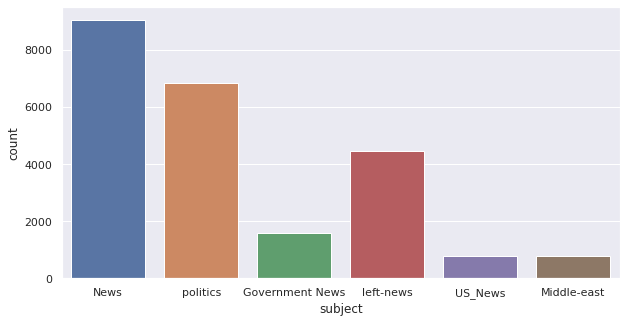

In [ ]:
sea.set(rc={'figure.figsize':(10, 5)})
sea.countplot(x = 'subject', data=fake_data)

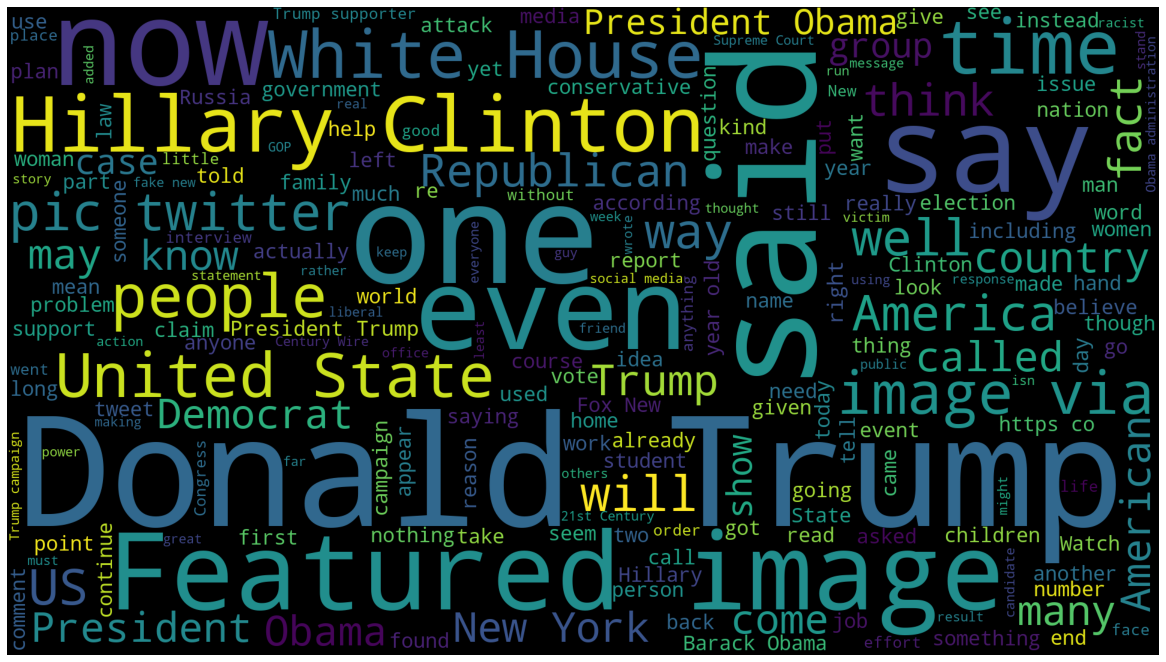

In [ ]:
text = ''.join(fake_data['text'].tolist())
worldcloud = wrld.WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(16, 9))
plt.imshow(worldcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Importing Real Dataset


In [ ]:
real_data = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

### Visualizing Real Dataset

In [ ]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
real_data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
real_data['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

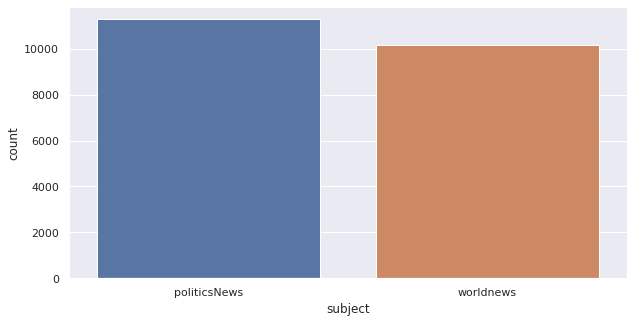

In [ ]:
sea.set(rc={'figure.figsize':(10, 5)})
sea.countplot(x = 'subject', data=real_data)

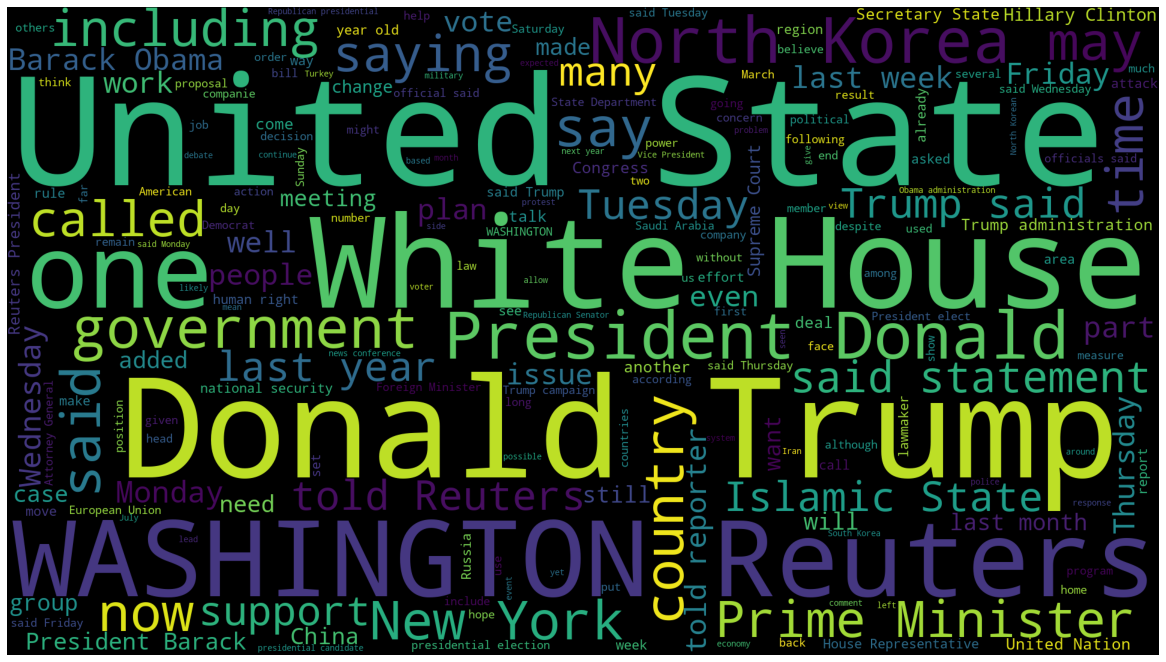

In [ ]:
text = ''.join(real_data['text'].tolist())
worldcloud = wrld.WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(16, 9))
plt.imshow(worldcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Understanding the Data

Real news most of the times have a publication source. That is not the case for fake news

After analyzing the data: 

*   The text "Washington Reuters" is present in most of the real news
*   Some does not have publication source



### Cleaning Data

In [ ]:
real_data.sample(5)

,title,text,subject,date
19901,Defense for Brazil's Temer asks Supreme Court ...,BRASILIA (Reuters) - Lawyers defending Brazili...,worldnews,"September 16, 2017"
11179,Obama to meet Michigan mayor to discuss contam...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"January 19, 2016"
146,Alabama Senate race winner urges Republican ri...,WASHINGTON (Reuters) - Alabama Democrat Doug J...,politicsNews,"December 14, 2017"
547,U.S. Senate candidate Moore's spokesman resign...,(Reuters) - The communications director for U....,politicsNews,"November 22, 2017"
5100,"Carson calls slaves 'immigrants' in speech, dr...","WASHINGTON (Reuters) - Ben Carson, the new sec...",politicsNews,"March 7, 2017"


As the sample data above shows, most of the text shows a source right at the beggining of the text -> NEW YORK (Reuters)

Need to classify news that have no source

In [ ]:
unknown_publishers = []

for index, row in enumerate(real_data.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]
    assert(len(record[0]) < 120) #If the record at index 0 has more then 120 characters... I'll consider not source name
  except:
    unknown_publishers.append(index)

In [ ]:
len(unknown_publishers)

222

As we can see below some of the registers with unknown source 

In [ ]:
real_data.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

Adding a source column. Registers with no source are filled with the text 'Unknown'

In [ ]:
source = []
temp_text = []

for index, row in enumerate(real_data.text.values):
  if index in unknown_publishers:
    temp_text.append(row)
    source.append('Unknown')
  else:
    record = row.split('-', maxsplit=1)
    source.append(record[0].strip())
    temp_text.append(record[1])


In [ ]:
real_data['source'] = source
real_data['text'] = temp_text

In [ ]:
real_data.sample(10)

,title,text,subject,date,source
14095,China must enhance protection of intellectual ...,It is strategically important for China s eco...,worldnews,"November 23, 2017",SHANGHAI (Reuters)
6088,Trump's exit from Pacific trade deal opens doo...,Germany would take advantage of any trade opp...,politicsNews,"January 23, 2017",BERLIN (Reuters)
1491,Senators urge Trump administration to act on M...,A group of Republican and Democratic senators...,politicsNews,"September 28, 2017",WASHINGTON (Reuters)
6524,Oil business seen in strong position as Trump ...,(This January 3 story was corrected to remove...,politicsNews,"January 3, 2017",Unknown
13157,France's Macron tells Trump concerned over Jer...,French President Emmanuel Macron told U.S. Pr...,worldnews,"December 4, 2017",PARIS (Reuters)
17358,Iraq warns Kurdistan not to shut down Kirkuk o...,Iraq said on Monday it was considering using ...,worldnews,"October 16, 2017",BAGHDAD (Reuters)
8138,Globally aligning derivatives rules dominates ...,Concerns about coordinating U.S. derivatives ...,politicsNews,"September 15, 2016",WASHINGTON (Reuters)
10456,Hillary Clinton to attend Nancy Reagan funeral...,Democratic presidential candidate Hillary Cli...,politicsNews,"March 8, 2016",WASHINGTON (Reuters)
6940,China labels Trump call 'petty action' by Taiw...,U.S. President-elect Donald Trump’s call with...,politicsNews,"December 3, 2016",BEIJING (Reuters)
3190,Six Michigan officials criminally charged in F...,Six current and former Michigan and Flint off...,politicsNews,"June 14, 2017",(Reuters)


Checking registers with blank text 

In [ ]:
fake_data_empy_indexes = [index for index, text in enumerate(fake_data.text.tolist()) if str(text).strip()=='']

In [ ]:
fake_data.iloc[fake_data_empy_indexes]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


As we can see the content of the news is also present in the title, so I'll be merging the title with the text

In [ ]:
real_data['text'] = real_data['title'] + ' ' + real_data['text']
fake_data['text'] = fake_data['title'] + ' ' + fake_data['text']

Lowering cases

In [ ]:
real_data['text'] = real_data['text'].apply(lambda x: str(x).lower())
fake_data['text'] = fake_data['text'].apply(lambda x: str(x).lower())

### Preprocessing Data

In [ ]:
real_data['class'] = 1
fake_data['class'] = 0

In [ ]:
real_data = real_data[['text', 'class']]
fake_data = fake_data[['text', 'class']]

In [ ]:
data = real_data.append(fake_data, ignore_index=True)

In [ ]:
data.sample(10)

,text,class
30302,watch maine governor’s racist rant for yourse...,0
1822,itg's selway drops out of running for key sec ...,1
39038,ball family member reveals sick reason lavar b...,0
15221,hezbollah calls on saudi arabia to cease inter...,1
38835,trey gowdy to dea chief on misconduct: “what t...,0
14332,dup says northern ireland will leave eu on sam...,1
40776,invited pop star says she’ll perform at trump ...,0
18114,bodies of egyptians killed by islamic state in...,1
11530,peruvian president divides opposition to avert...,1
29014,oklahoma gop approved a law that would increa...,0


In [ ]:
data['text'] = data['text'].map(lambda x: re.sub(r'/[!@#$%^&*]/g', '', x))

In [ ]:
data.sample(10)

,text,class
21110,pilgrims return to mecca as haj winds down wit...,1
6832,clinton calls 'fake news' a threat to u.s. dem...,1
15580,somalia's islamist insurgency executes four me...,1
4780,house oversight panel seeks ex-trump aide flyn...,1
26200,watch: trump awkwardly panders to empty black...,0
18540,france urges all sides in cameroon to show res...,1
32587,syrian refugee who shocked cnn anchor is back!...,0
10226,obama spars with cuba's castro over human righ...,1
5920,iraqi mps want parliament to discuss u.s. trav...,1
13922,ukraine agrees to sign eu summit declaration: ...,1


### Vectorization

**Word Embedding** is a language modeling technique used for mapping words to vectors of real numbers. It represents words or phrases in vector space with several dimensions. Word embeddings can be generated using various methods like neural networks, co-occurrence matrix, probabilistic models, etc.

**Word2Vec** consists of models for generating word embedding. These models are shallow two layer neural networks having one input layer, one hidden layer and one output layer

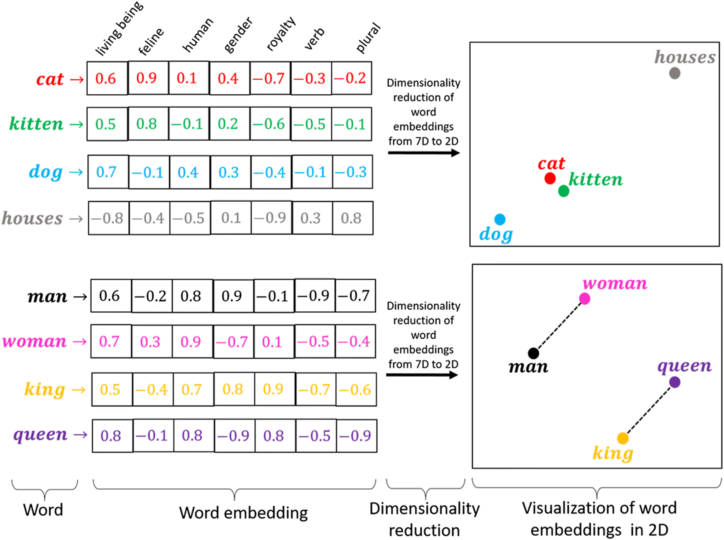

In [ ]:
import gensim # Free open-source Python library for representing documents as semantic vectors, as efficiently (computer-wise) and painlessly (human-wise) as possibl

In [ ]:
y = data['class'].values

In [ ]:
x = [d.split() for d in data['text'].tolist()]

In [ ]:
dimension = 100
wv2_model = gensim.models.Word2Vec(sentences=x, size=dimension, window=10, min_count=1) # generating model

In [ ]:
len(wv2_model.wv.vocab)

375437

In [ ]:
wv2_model.wv['trump']

array([ 0.1332655 ,  3.1427069 , -0.22599143, -0.8398439 , -1.8102036 ,
       -0.34358847,  2.08459   ,  1.7509849 ,  0.2900019 , -3.1279783 ,
        1.1629609 , -1.955637  , -1.975017  , -0.948424  , -1.1191927 ,
       -2.38667   ,  0.5763987 , -0.92131394,  1.216738  , -0.8751487 ,
        9.152373  ,  1.5212916 , -3.8786418 , -1.6768259 ,  1.3567823 ,
       -3.9386349 , -4.823444  , -3.5183802 , -3.4154239 ,  0.9097187 ,
        0.31662437,  3.498932  ,  5.3181114 , -2.509309  , -1.1259602 ,
       -5.3976088 ,  3.55866   , -2.90267   ,  2.8266244 , -7.019184  ,
       -2.9062495 , -0.493676  ,  0.23587918,  3.9332032 , -1.3674827 ,
        2.752809  , -0.18438631,  0.89297354, -0.9900486 , -1.5424154 ,
       -2.5513556 , -0.12323896,  5.681035  ,  4.0775847 ,  1.943135  ,
       -0.28542525, -2.651737  ,  0.582134  ,  1.7406896 , -0.6469792 ,
        1.5406505 , -2.1889663 ,  0.42478284,  3.2655783 , -0.598645  ,
       -0.7551624 ,  4.7849135 ,  3.5037582 , -6.471518  ,  5.22

In [ ]:
wv2_model.wv.most_similar('bolsonaro')

[('newly-elected', 0.5815223455429077),
 ('alckmin', 0.5812237858772278),
 ('howard-taylor', 0.580541729927063),
 ('pinera', 0.5735917091369629),
 ('ciatterelli,', 0.5711724758148193),
 ('obrador', 0.5665445923805237),
 ('renationalisation,', 0.564064085483551),
 ("peru's", 0.5573407411575317),
 ('guillier', 0.5564675331115723),
 ('$13.4', 0.555730402469635)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x) # index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot)

In [ ]:
x = tokenizer.texts_to_sequences(x)

In [ ]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'with': 13,
 'was': 14,
 'it': 15,
 'trump': 16,
 'as': 17,
 'his': 18,
 'by': 19,
 'said': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'from': 24,
 'not': 25,
 'at': 26,
 'are': 27,
 'this': 28,
 'who': 29,
 'an': 30,
 'they': 31,
 'but': 32,
 'would': 33,
 'we': 34,
 'i': 35,
 'about': 36,
 'u.s.': 37,
 'will': 38,
 'their': 39,
 'president': 40,
 'had': 41,
 'been': 42,
 'you': 43,
 't': 44,
 'were': 45,
 'or': 46,
 'after': 47,
 'which': 48,
 'more': 49,
 'she': 50,
 'people': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'what': 55,
 'when': 56,
 'new': 57,
 'out': 58,
 'all': 59,
 'its': 60,
 'also': 61,
 'over': 62,
 'donald': 63,
 'state': 64,
 'no': 65,
 'up': 66,
 'our': 67,
 'there': 68,
 'can': 69,
 'said.': 70,
 'just': 71,
 'than': 72,
 'house': 73,
 'other': 74,
 'some': 75,
 'could': 76,
 'republican': 77,
 'obama': 78,
 'into': 79,
 'told': 80,
 'united

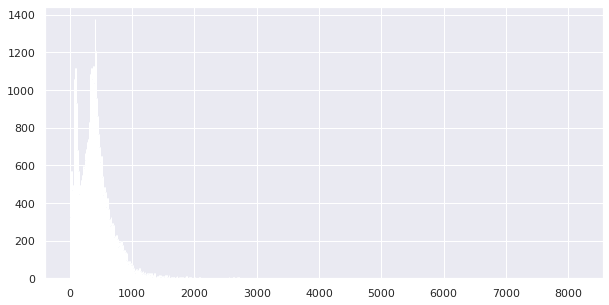

In [ ]:
plt.hist([len(word) for word in x], bins=700) #histogram counting word occurrences
plt.show()

In [ ]:
max_length = 1000
x = pad_sequences(x, maxlen=max_length)
x

array([[    0,     0,     0, ...,     8,     1,  9442],
       [    0,     0,     0, ...,    39,  2174, 10542],
       [    0,     0,     0, ...,  4250,    12,    70],
       ...,
       [ 8964,  1151, 12420, ...,   904,   434,  2636],
       [    0,     0,     0, ...,   904,  7951,   452],
       [    0,     0,     0, ...,   904,   301,  2636]], dtype=int32)

In [ ]:
vocab = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, dimension))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(wv2_model)

In [ ]:
embedding_vectors.shape

(375438, 100)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=dimension, weights=[embedding_vectors], input_length=max_length, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         37543800  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 37,661,177
Trainable params: 117,377
Non-trainable params: 37,543,800
_________________________________________________________________


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
model.fit(x_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 127s 163ms/step - loss: 0.1267 - acc: 0.9566 - val_loss: 0.0703 - val_acc: 0.9767
Epoch 2/6
737/737 [==============================] - 125s 169ms/step - loss: 0.0609 - acc: 0.9809 - val_loss: 0.0552 - val_acc: 0.9821
Epoch 3/6
737/737 [==============================] - 120s 162ms/step - loss: 0.0348 - acc: 0.9893 - val_loss: 0.0499 - val_acc: 0.9847
Epoch 4/6
737/737 [==============================] - 119s 162ms/step - loss: 0.0243 - acc: 0.9922 - val_loss: 0.0245 - val_acc: 0.9930
Epoch 5/6
737/737 [==============================] - 126s 171ms/step - loss: 0.0144 - acc: 0.9957 - val_loss: 0.0265 - val_acc: 0.9913
Epoch 6/6
737/737 [==============================] - 120s 163ms/step - loss: 0.0113 - acc: 0.9969 - val_loss: 0.0228 - val_acc: 0.9931


In [ ]:
y_pred = (model.predict(x_test) >= 0.5).astype(int)

In [ ]:
accuracy_score(y_test, y_pred)

0.9936748329621381

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5856
           1       0.99      0.99      0.99      5369

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



### Testing

First test with obvious fake news

In [ ]:
custom_test1 = ['NASA reveals decade old secret that shocks the world: the moon is actuallly made of cheese!']
custom_test1 = tokenizer.texts_to_sequences(custom_test1)
custom_test1 = pad_sequences(custom_test1, maxlen=max_length)

In [ ]:
(model.predict(custom_test1))

array([[0.01032821]], dtype=float32)

Second test with a more "believable" fake news

In [ ]:
custom_test2 = ['Donald Trump declared wineer of the 2020 election after fierce battle against Joe Biden']
custom_test2 = tokenizer.texts_to_sequences(custom_test2)
custom_test2 = pad_sequences(custom_test2, maxlen=max_length)

In [ ]:
(model.predict(custom_test2))

array([[0.01886911]], dtype=float32)

Third fake news with obvious fake news

In [ ]:
custom_test3 = ['Bolsonaro declares himself as Brazil dictator after military coup. After fierce battle against revolutionary forces and several dead soldiers, Bolsonaro already set plans to invade neighbour countries, starting with Argentina']
custom_test3 = tokenizer.texts_to_sequences(custom_test3)
custom_test3 = pad_sequences(custom_test3, maxlen=max_length)

In [ ]:
(model.predict(custom_test3))

array([[0.8534007]], dtype=float32)

Fourth news took from a CNN article

In [ ]:
custom_test4 = ['Leaders from all corners of the US government condemned Russia\'s recent test of an anti-satellite weapon on Wednesday at the inaugural meeting of the National Space Council under the Biden administration, calling for accelerating the development of rules and norms in space']
custom_test4 = tokenizer.texts_to_sequences(custom_test4)
custom_test4 = pad_sequences(custom_test4, maxlen=max_length)

In [ ]:
(model.predict(custom_test4))

array([[0.9893003]], dtype=float32)

Fifth news took from a Fox News article

In [ ]:
custom_test5 = ['President Biden declared Tuesday during an event in Minnesota that he \"used to drive\" a tractor-trailer. Biden repeated the debunked claim during a trip to Dakota County Technical College in Rosemount, Minnesota, to tout the newly passed bipartisan Infrastructure Investment and Jobs Act.Biden repeated the debunked claim during a trip to Dakota County Technical College in Rosemount, Minnesota, to tout the newly passed bipartisan Infrastructure Investment and Jobs Act.']
custom_test5 = tokenizer.texts_to_sequences(custom_test5)
custom_test5 = pad_sequences(custom_test5, maxlen=max_length)

In [ ]:
(model.predict(custom_test5))

array([[0.9696417]], dtype=float32)

As we can see because the model simply takes the vetorization method, it simply compares the text with how similarly it is with the real news dataset. No mather what the context of it is, if it "seems" like a real news, using specific therms, the algorithm will flag as a real news. The only utility I see is flag super obvious fake news like the moon is made of cheese